## Churn Data Analysis

## 1. Import Libraries

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

from dmba import plotDecisionTree

no display found. Using non-interactive Agg backend


## 2. Prepare Data

In [14]:
churn_df = pd.read_csv('churn.csv')
churn_df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [15]:
# Since the categorical variables are all ordinary, use label encoding to avoid explosive dimensions 
churn_df['COLLEGE'] = churn_df['COLLEGE'].replace('zero', 0)
churn_df['COLLEGE'] = churn_df['COLLEGE'].replace('one', 1)

churn_df['LEAVE'] = churn_df['LEAVE'].replace('STAY', 1)
churn_df['LEAVE'] = churn_df['LEAVE'].replace('LEAVE', 0)

churn_df['REPORTED_SATISFACTION'] = churn_df['REPORTED_SATISFACTION'].replace('very_unsat', 1)
churn_df['REPORTED_SATISFACTION'] = churn_df['REPORTED_SATISFACTION'].replace('unsat', 2)
churn_df['REPORTED_SATISFACTION'] = churn_df['REPORTED_SATISFACTION'].replace('avg', 3)
churn_df['REPORTED_SATISFACTION'] = churn_df['REPORTED_SATISFACTION'].replace('sat', 4)
churn_df['REPORTED_SATISFACTION'] = churn_df['REPORTED_SATISFACTION'].replace('very_sat', 5)

churn_df['REPORTED_USAGE_LEVEL'] = churn_df['REPORTED_USAGE_LEVEL'].replace('very_little', 1)
churn_df['REPORTED_USAGE_LEVEL'] = churn_df['REPORTED_USAGE_LEVEL'].replace('little', 2)
churn_df['REPORTED_USAGE_LEVEL'] = churn_df['REPORTED_USAGE_LEVEL'].replace('avg', 3)
churn_df['REPORTED_USAGE_LEVEL'] = churn_df['REPORTED_USAGE_LEVEL'].replace('high', 4)
churn_df['REPORTED_USAGE_LEVEL'] = churn_df['REPORTED_USAGE_LEVEL'].replace('very_high', 5)

churn_df['CONSIDERING_CHANGE_OF_PLAN'] = churn_df['CONSIDERING_CHANGE_OF_PLAN'].replace('actively_looking_into_it', 1)
churn_df['CONSIDERING_CHANGE_OF_PLAN'] = churn_df['CONSIDERING_CHANGE_OF_PLAN'].replace('considering', 2)
churn_df['CONSIDERING_CHANGE_OF_PLAN'] = churn_df['CONSIDERING_CHANGE_OF_PLAN'].replace('perhaps', 3)
churn_df['CONSIDERING_CHANGE_OF_PLAN'] = churn_df['CONSIDERING_CHANGE_OF_PLAN'].replace('never_thought', 4)
churn_df['CONSIDERING_CHANGE_OF_PLAN'] = churn_df['CONSIDERING_CHANGE_OF_PLAN'].replace('no', 5)

churn_df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,2,2,5,1
1,1,36147,0,13,800586,244,0,6,2,2,2,1
2,1,27273,230,0,305049,201,16,15,2,1,3,1
3,0,120070,38,33,788235,780,3,2,2,5,2,0
4,1,29215,208,85,224784,241,21,1,1,2,4,1


In [16]:
churn_df.describe()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,2.566100,2.815050,2.608150,0.507400
std,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,1.629437,1.511839,1.465848,0.499958
min,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000
50%,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,2.000000,2.000000,2.000000,1.000000
75%,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,5.000000,5.000000,4.000000,1.000000
max,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,5.000000,5.000000,5.000000,1.000000


In [17]:
# Check missing value in the dataframe 
churn_df.isnull().values.any()

False

In [18]:
# Check to see if the target variable is balance
churn_df['LEAVE'].value_counts()

1    10148
0     9852
Name: LEAVE, dtype: int64

## 3. Applied Decision Tree Classification Modelling

In [19]:
# Copy data
tree_df = churn_df

In [20]:
# Split variables into features and target 
features = list(tree_df.columns)[:-1]
X = tree_df[features]
print('features: ', features)

target = tree_df.columns[-1]
y = tree_df[target]
print('target: ', target)

features:  ['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
target:  LEAVE


In [21]:
# Split data into 70% training and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [22]:
# Create Decision Tree classifer object
tree_cl = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree_cl = tree_cl.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = tree_cl.predict(X_test)

# Print Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6206666666666667


Accuracy: 0.7055


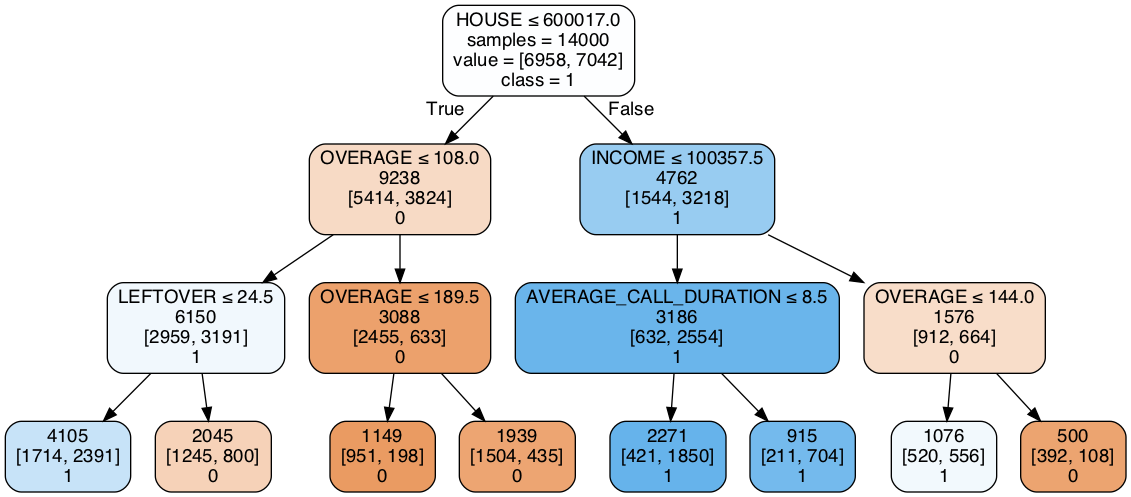

In [23]:
# Create Decision Tree classifer object
tree_cl = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
tree_cl = tree_cl.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = tree_cl.predict(X_test)

# Print Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Plot Decision Tree
plotDecisionTree(tree_cl, feature_names=features, class_names=tree_cl.classes_)

In [29]:
tree_cl.predict_proba(X_test)

array([[0.60880196, 0.39119804],
       [0.41753959, 0.58246041],
       [0.60880196, 0.39119804],
       ...,
       [0.60880196, 0.39119804],
       [0.18538089, 0.81461911],
       [0.60880196, 0.39119804]])

In [58]:
from xgboost import XGBClassifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [68]:
xgb = XGBClassifier()

In [75]:
xgb.set_params(max_depth = 3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred_xgb = xgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.7098333333333333


In [78]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [87]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [90]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=4 )


random_search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    3.1s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fec6fc523d0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=3,
                                           min_child_weight=1, missin...
                                           subsample=1, tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None),
                   iid='deprecated', n_ite

In [92]:
y_pred_xgb1 = random_search.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb1))

Accuracy: 0.7103333333333334


In [93]:
random_search.predict_proba(X_test)

array([[0.5462522 , 0.4537478 ],
       [0.43121153, 0.56878847],
       [0.5564654 , 0.44353464],
       ...,
       [0.6521764 , 0.34782365],
       [0.14783633, 0.8521637 ],
       [0.64760077, 0.35239926]], dtype=float32)

## 4. K-Means Clustering 

In [100]:
# Copy data 
kmeans_df = churn_df

In [101]:
# Convert int to float 
kmeans_df = kmeans_df.apply(lambda x: x.astype('float64'))
# Drop categorical data
kmeans_df = kmeans_df.drop(["COLLEGE","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"],axis=1)
# Normalize distance 
kmeans_norm = kmeans_df.apply(preprocessing.scale, axis=0)
kmeans_norm.head(5)

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
0,-1.160,-1.000,-0.667,-0.712,-1.069,-0.896,-4.548e-01
1,-1.059,-1.000,-0.406,1.218,-0.681,-0.896,-5.111e-04
2,-1.272,1.675,-0.891,-0.745,-0.882,0.896,2.044e+00
3,0.955,-0.558,0.339,1.169,1.826,-0.560,-9.091e-01
4,-1.225,1.419,2.279,-1.063,-0.695,1.456,-1.136e+00


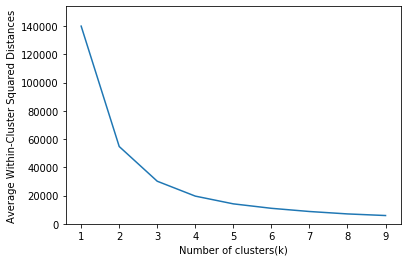

In [102]:
# Find the optimum k by elbow plot 
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(kmeans_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [103]:
# Fit a k-Means clustering with k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(kmeans_norm)

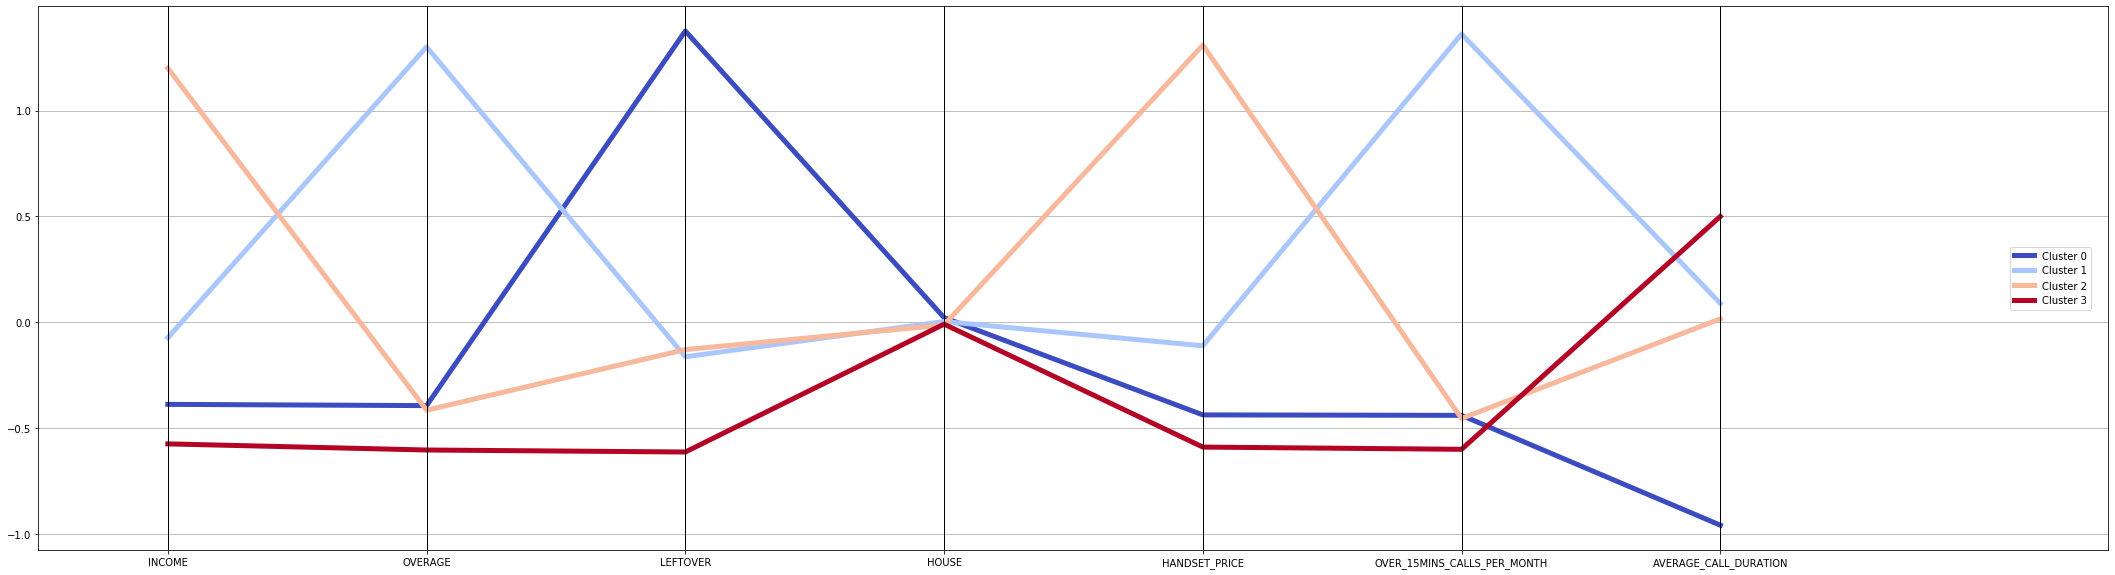

In [147]:
# Plot the Profile of Cluster Centroids
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='coolwarm', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [104]:
# Show the resulting centroid value
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=kmeans_norm.columns)
pd.set_option('precision', 3) # round to 3 decimal places
print(centroids)

   INCOME  OVERAGE  LEFTOVER  HOUSE  HANDSET_PRICE  \
0  -0.387   -0.393     1.376  0.022         -0.437   
1  -0.072    1.300    -0.162  0.004         -0.111   
2   1.200   -0.415    -0.128 -0.012          1.309   
3  -0.574   -0.603    -0.612 -0.008         -0.589   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  
0                       -0.439                 -0.957  
1                        1.361                  0.089  
2                       -0.454                  0.017  
3                       -0.599                  0.500  


In [105]:
# Show sum of squared distance of each data point in a dataset
# Calculate the distances of each data point to the cluster centers
distances = kmeans.transform(kmeans_norm)

# Reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# Combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=kmeans_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (3818 members): 13352.69 within cluster 
Cluster 1 (5467 members): 27943.82 within cluster 
Cluster 2 (4524 members): 19243.46 within cluster 
Cluster 3 (6191 members): 17874.07 within cluster 


Each cluster has distinct characteristics, we can use kmeans.predict() function to assign new cluster group for new data acquired

Cluster population analysis

In [106]:
# Add user cluster label to the data
kmeans_df['Cluster'] = df['cluster']
kmeans_df.head(5)

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,Cluster
0,31953.0,0.0,6.0,313378.0,161.0,0.0,4.0,3
1,36147.0,0.0,13.0,800586.0,244.0,0.0,6.0,3
2,27273.0,230.0,0.0,305049.0,201.0,16.0,15.0,1
3,120070.0,38.0,33.0,788235.0,780.0,3.0,2.0,2
4,29215.0,208.0,85.0,224784.0,241.0,21.0,1.0,0


In [191]:
# Check cluster allocation in population
cluster_population = ((kmeans_df['Cluster'].value_counts()/kmeans_df.shape[0])).sort_index()
cluster_population

0    0.191
1    0.273
2    0.226
3    0.310
Name: Cluster, dtype: float64

In [190]:
# Copy kmeans data 
temp = kmeans_df
# Temporary add back leave data 
temp['LEAVE'] = churn_df['LEAVE']
# Check churning rate in each cluster
# Since value was coded as 0 and 1, we can calculate the percentage of 0 by 1-mean
cluster_leave = 1-(temp.groupby(['Cluster'])['LEAVE'].mean())
cluster_leave

Cluster
0    0.506
1    0.647
2    0.489
3    0.351
Name: LEAVE, dtype: float64

In [193]:
# Check cluster makeup over all LEAVE=0 population
# 1. Multiply the previous two series to calculate the cluster makeup over all population 
cluster_pop_leave = cluster_population * cluster_leave 
# 2. Divided the result by the % of LEAVE=0 over all population
cluster_pop_leave / sum(cluster_pop_leave)

0    0.196
1    0.359
2    0.224
3    0.221
dtype: float64

## 5. Demo Prediction for a New User

In [120]:
# Initialized a new user with random data and unknown target
new = pd.DataFrame([[0, 120070, 107, 39, 573408, 780, 3, 2, 2, 5, 3]], columns=features)
new

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,0,120070,107,39,573408,780,3,2,2,5,3


In [121]:
# Predict this new user's churning by the decision tree model 
new_pred = tree_cl.predict(new)
new_pred

array([0])

In [124]:
# The result suggested a churning, so we use the k-means clutering model to find the new users' nearest cluster 
new_num = new.drop(["COLLEGE","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN"],axis=1)
kmeans.predict(new_num)

array([2], dtype=int32)

The result predicted the nearest cluster to the new user is cluster 2, we can then provide promition plan to prevent the new user from churning based on cluster 2's characteristics.

## 6.Business Insight calculation

In [198]:
CA_mobile_user = 31000000
company_market_share = 0.3
churn_rate = 0.011
mobile_plan = 60
tree_accuracy = 0.705
prevent_rate = 0.5
expense = 500000
Profit = CA_mobile_user * company_market_share * churn_rate * mobile_plan * tree_accuracy * prevent_rate - expense
print(Profit)

1663645.0
